# Preparación y análisis de datos

En primer lugar, antes de abordar los problemas de clasificación y regresión, buscamos hacernos una idea de cómo son los datos.

#### Carga de librerias

A lo largo del trabajo emplearemos la librería Pandas, para la manipulación de los datos. Además, para todo lo relacionado con los moelos de regresión y clasificación, usaremos la librería scikit-learn. Por último, para la visualización de datos, usaremos Matplotlib y Seaborn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
import numpy as np

%matplotlib inline
plt.style.use('bmh')

#### Carga de datos

Cargamos los datos usando dataframe de Pandas.

In [3]:
df = pd.read_csv('EstudioCrediticio_TrainP.csv')

### Primera visualización de los datos

Según el enunciado dado, nuestro conjunto de datos consta de 50.000 filas y numerosos atributos. Así, en función del perfil de los clientes, el banco puede decidir conceder o denegar un préstamo, reduciendo la probabilidad de un impago. También, podría estimar el riego de una operación de concesión de préstamos.

Hechemos un vistazo rápido a las primeras y últimas columnas para ver que tipos de atributos tenemos.

In [4]:
df.head()

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,1,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,...,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,0,50.0
1,2,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,...,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,0,54.0
2,3,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,...,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,1,42.4
3,4,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,...,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,1,45.6
4,5,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,...,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,0,61.0


In [5]:
df.tail()

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
49995,49996,40,29951,600.0,Empleado/a por cuenta ajena,FP,18.0,5945,24,Divorciado/a,...,2495.916667,NaN,5,43626,0.145945,0.142934,286.261413,0.216859,1,38.4
49996,49997,31,31974,466.0,Empleado/a por cuenta ajena,Doctorado,NaN,13572,72,Casado/a,...,2664.500000,0.797176,6,10350,0.260572,0.245778,362.082922,0.318290,0,50.0
49997,49998,55,68679,611.0,Empleado/a por cuenta ajena,Bachillerato,31.0,16481,60,Casado/a,...,5723.250000,0.957306,7,31159,0.180981,0.182967,421.174132,0.186638,0,63.0
49998,49999,36,23501,599.0,Empleado/a por cuenta ajena,Bachillerato,11.0,29518,12,Casado/a,...,1250.000000,0.813055,2,61452,0.160018,0.148244,2661.800236,2.647840,0,61.0
49999,50000,24,31136,580.0,Empleado/a por cuenta ajena,FP,2.0,8380,36,NaN,...,2594.666667,NaN,7,11516,0.168380,0.167265,297.630591,0.477376,0,56.0


Observamos que tenemos:
- Variables binarias (HistoricoImagos, CreditoAprobado)
- Variables categóricas cualitativas (EstadoCivil, Experiencia)
- Variables categóricas discretas (Edad, DuracionCredito, CantidadPersonasDependientes, TasaUtilizacionTarjetaCredito, RatioTotalDeudaIngresos)
- Variables numéricas (IngresoBrutoAnual, BalanceCuentaCorriente, PatrimonioNeto)
- Valores nulos representados por un 'NaN'
- Variables objetivo: ScoreRiesgo (numérica), CreditoAprobado (categórica)
- Variable de identificación (Id)

Ahora veremos la forma de nuestro conjunto.

In [6]:
df.shape

(50000, 36)

Observamos que realmente tenemos 50.000 filas. Además, el número de variables será de 36.

Veamos si tenemos algún duplicado en nuestros datos.

In [7]:
df.drop_duplicates()
df.shape

(50000, 36)

Observamos que no tenemos duplicados.

Veamos ahora el tipo con el que se almacenan nuestros datos, así como el número de valores nulos.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             50000 non-null  int64  
 1   Edad                           50000 non-null  int64  
 2   IngresoBrutoAnual              50000 non-null  int64  
 3   ScoreCrediticio                47500 non-null  float64
 4   SituacionLaboral               50000 non-null  object 
 5   NivelEducativo                 45000 non-null  object 
 6   Experiencia                    37000 non-null  float64
 7   CuantiaCredito                 50000 non-null  int64  
 8   DuracionCredito                50000 non-null  int64  
 9   EstadoCivil                    39000 non-null  object 
 10  NumeroPersonasDependientes     44000 non-null  float64
 11  EstadoVivienda                 50000 non-null  object 
 12  PagoMensualDeuda               50000 non-null 

Observamos que la mayoría de las variables se almacenan como numéricas. Las variables categóricas binarias ya están codificadas como enteros. De esta forma, solo va a ser necesario aplicar una codificación para aquellas variables categóricas como ObjetoCredito o EstadoCivil. Todas las variables categóricas que todavía no han sido codificadas son nominales. De esta forma, emplearemos One-Hot Encoding en lugar de Dummy Encoding cuando el modelo requiera una codificación de estas variables.

El motivo es que One-Hot Encoding crea una columna separada para cada categoría de las variables. Esto es preferible en nuestro caso, ya que tenemos 5 variables nominales, y con Dummy Encoding podríamos perder información valiosa al eliminar una categoría por cada variable. One-Hot Encoding, en cambio, preserva toda la información, lo que es crucial porque queremos que cada una de ellas sea representada de manera completa en el modelo.

Hemos comprobado mediante Excel que no existe ningún error con las categorías de las variables que contienen texto. Es decir, que no hay problemas de palabras con pequeños errores que provocarían una nueva categoría al codificar.

Además, observamos que variables como EstadoCivil o Experiencia contienen muchos valores nulos.

### <font color='red'>TODO</font> mirar lo del número de categorias y además para las variables int categóricas. ¿Hay que dividir las discretas en grupos? (Para el final, no es importante de momento)

Me refiero a que hay variables enteras que realmente son categóricas pero ordinales, como edad. Podría ser interesante dividirlo en grupos, pero no se si es necesario o no.

### Valores nulos

Veamos más detalladamente que datos faltan.

In [9]:
null_columns = df.columns[df.isnull().any()]
print(df.isnull().sum()[null_columns])

ScoreCrediticio                2500
NivelEducativo                 5000
Experiencia                   13000
EstadoCivil                   11000
NumeroPersonasDependientes     6000
HistoricoPagosSuministros      8500
dtype: int64


Así, se nos presentan varias opciones para tratar con ellos. En primer lugar, podríamos intentar borrar las columnas o filas con valores nulos. Por otro lado, podríamos rellenar los valores nulos con una medida de tendencia central o mediante estimaciones.

Eliminar filas o columnas con valores nulos puede parecer una solución simple, pero conlleva serios problemas. Si eliminamos columnas como "Experiencia" o "ScoreCrediticio", estaríamos descartando información valiosa que podría ser crucial para el análisis. Además, eliminar filas con valores nulos implicaría perder una parte significativa del dataset (hasta un 26%), lo que reduciría la cantidad de datos disponibles para el análisis y los modelos predictivos, afectando su precisión.

En cambio, la imputación de valores nulos es una mejor opción porque nos permite conservar la mayoría de los datos. Al rellenar los valores vacíos con estimaciones basadas en tendencias, preservamos la integridad del dataset y evitamos la pérdida de información. Esto también ayuda a mantener la consistencia en los análisis y asegura que nuestros modelos sean más robustos y precisos, sin sacrificar una cantidad significativa de datos.

En primer lugar, consideraremos un SimpleImputer para rellenar los vacío con la media, mediana, moda o una constante, dependiendo del tipo de datos. También, hemos considerado un KNNImputer para rellenar utilizando valores vecinos, sobre todo para valores numéricos. En algunos casos se han considerado métodos avanzados como IterativeImputer pero computacionalmente más costosos.

En general, se empleará el uso de SimpleImputer con mean o median para variables numéricas y most_frequent para categóricas. Sin embargo, en algunos casos comprobaremos IterativeImputer o KNNImputer ya que pueden proporcionar resultados más robustos.
Si la información sobre los valores faltantes es importante para el modelo predictivo, combinaremos MissingIndicator con uno de los imputers mencionados.

### Metadata

Antes de llevar a cabo el estudio descriptivo, es importante tener una idea de la información que nos interesa de nuestras variables. En este apartado, vamos a crear un DataFrame que incluya una descripción detallada de cada variable, como su tipo de dato, posibles valores y la cantidad de valores nulos. Este paso es clave para entender la estructura del dataset y nos ayudará a identificar qué variables requerirán mayor atención en el análisis descriptivo posterior, asegurando un estudio más completo y preciso.

De forma detallada, almacenaremos:
- rol: objetivo, id, predictora
- dtype: int, float, str
- keep: True o False
- nulos

In [8]:
data = []

for c in df.columns:

    # Rol
    if c == 'CreditoAprobado' or c == 'ScoreRiesgo':
        rol = 'objetivo'
    elif c == 'Id':
        rol = 'id'
    else:
        rol = 'predictora'

    # Dtype
    dtype = df[c].dtype

    # Keep
    keep = not c == 'Id'

    # Nulos
    nulos = df[c].isnull().sum()

    c_dict = {
        'varname': c,
        'rol': rol,
        'dtype': dtype,
        'keep': keep,
        'nulos': nulos
    }
    data.append(c_dict)

meta = pd.DataFrame(data, columns=['varname', 'rol', 'dtype', 'keep', 'nulos'])
meta.set_index('varname', inplace=True)

In [9]:
meta

,rol,dtype,keep,nulos
varname,,,,
Id,id,int64,False,0
Edad,predictora,int64,True,0
IngresoBrutoAnual,predictora,int64,True,0
ScoreCrediticio,predictora,float64,True,2500
SituacionLaboral,predictora,object,True,0
NivelEducativo,predictora,object,True,5000
Experiencia,predictora,float64,True,13000
CuantiaCredito,predictora,int64,True,0
DuracionCredito,predictora,int64,True,0


### Análisis descriptivo

Podemos aplicar el análisis descriptivo en nuestro conjunto de datos. Sin embargo, no tiene mucho sentido calcular métricas como la media o la desviación estándar en variables categóricas y la variable id. Exploraremos visualmente las variables categóricas más adelante.

Gracias a nuestro metadata podemos seleccionar fácilmente las variables sobre las que queremos calcular las estadísticas descriptivas. Para dejar las cosas claras, haremos esto por tipo de datos.

#### Variables continuas

In [12]:
v = meta[(meta.dtype == 'float64') & (meta.keep) & (meta.rol == 'predictora')].index
df[v].describe()

,ScoreCrediticio,Experiencia,NumeroPersonasDependientes,TasaUtilizacionTarjetaCredito,RatioDeudaIngresos,IngresoBrutoMensual,HistoricoPagosSuministros,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos
count,47500.000000,37000.000000,44000.000000,50000.000000,50000.000000,50000.000000,41500.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,570.975347,17.447459,1.539386,0.285653,0.285683,3009.648663,0.799806,0.194503,0.194582,519.574152,0.439196
std,51.732132,11.280861,1.393505,0.159963,0.159389,2014.586218,0.120928,0.034073,0.039081,385.750819,0.311938
min,358.000000,0.000000,0.000000,0.001204,0.000701,1250.000000,0.217950,0.088792,0.083259,44.093087,0.017110
25%,539.000000,9.000000,0.000000,0.161648,0.161732,1596.958333,0.726844,0.170016,0.166589,280.615934,0.219170
50%,578.000000,17.000000,1.000000,0.262764,0.264684,2435.416667,0.820477,0.191688,0.190946,414.927762,0.360822
75%,609.000000,25.000000,3.000000,0.389237,0.388633,3720.750000,0.892515,0.216305,0.218748,626.940786,0.571029
max,714.000000,62.000000,5.000000,0.946886,0.921339,25000.000000,0.999603,0.352866,0.378914,6343.673199,4.961286


Existen grandes diferencias entre los rangos de las distintas variables. En algunos casos, estamos trabajando sobre lo que parecen ratios, como con TasaUtilizacionTarjetaCredito o RatioDeudaIngresos. En otros, los valores son de gran magnitud, como el ScoreCrediticio.

#### Variables ordinales

In [13]:
v = meta[(meta.dtype == 'int64') & (meta.keep) & (meta.rol == 'predictora')].index
df[v].describe()

,Edad,IngresoBrutoAnual,CuantiaCredito,DuracionCredito,PagoMensualDeuda,NumeroLineasCreditoAbiertas,NumeroSolicitudesCredito,HistoricoInsolvencia,HistoricoImpagos,HistoricoPagos,DuracionHistoricoCredito,BalanceCuentaAhorros,BalanceCuentaCorriente,TotalActivos,TotalPasivos,EstabilidadLaboral,PatrimonioNeto
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.00000,5.000000e+04
mean,39.757580,36386.727360,15219.269420,53.716560,457.805840,3.009180,0.996600,0.05078,0.100660,24.013000,14.999280,4963.275200,1802.241480,9.943547e+04,3.647976e+04,4.99354,7.472013e+04
std,11.606172,24526.447116,8102.208893,24.630848,245.646956,1.735833,1.004434,0.21955,0.300881,4.906595,8.364164,6519.685943,2320.408753,1.327941e+05,4.644231e+04,2.22108,1.295051e+05
min,18.000000,15000.000000,1517.000000,12.000000,50.000000,0.000000,0.000000,0.00000,0.000000,7.000000,1.000000,65.000000,6.000000,2.272000e+03,2.560000e+02,0.00000,1.000000e+03
25%,32.000000,19276.500000,9616.000000,36.000000,287.000000,2.000000,0.000000,0.00000,0.000000,21.000000,8.000000,1517.000000,559.000000,3.086250e+04,1.126000e+04,3.00000,8.580000e+03
50%,40.000000,29379.000000,13427.000000,48.000000,402.000000,3.000000,1.000000,0.00000,0.000000,24.000000,15.000000,3003.000000,1096.000000,5.995250e+04,2.204050e+04,5.00000,3.280800e+04
75%,48.000000,44947.750000,18805.250000,60.000000,566.000000,4.000000,2.000000,0.00000,0.000000,27.000000,22.000000,5939.000000,2144.000000,1.186862e+05,4.352900e+04,6.00000,9.012050e+04
max,80.000000,300000.000000,116887.000000,120.000000,3332.000000,15.000000,7.000000,1.00000,1.000000,45.000000,29.000000,180190.000000,79957.000000,6.550918e+06,1.354161e+06,16.00000,6.526980e+06


En este caso también tenemos grandes diferencias entre los distintos rangos de valores. Podríamos aplicar un escalado para trabajar con ello.

#### Variables dependientes

In [14]:
v = meta[(meta.rol == 'objetivo')].index
df[v].describe()

,CreditoAprobado,ScoreRiesgo
count,50000.000000,50000.000000
mean,0.293240,50.742756
std,0.455252,7.918796
min,0.000000,26.400000
25%,0.000000,44.800000
50%,0.000000,52.000000
75%,1.000000,56.000000
max,1.000000,81.000000


Vemos como el intervalo de ScoreRiesgo es de 0 a 100. Difiere significativamente del resto de variables, por lo que deberemos estudiar técnicas de normalización y estandarización para aquellos métodos que lo requieran.

Para este caso, la variable categórica CreditoAprobado presenta un cierto desbalanceo. Vemos como la clase mayoritaria es la clase 0 (rechazo). El porcentaje de rechazo es de poco más del 70%.

### Desbalanceo de datos

Como hemos mencionado arriba, la proporción de rechazo del crédito es significativamente mayor que la de aprobación. Esto puede dar lugar a modelos sesgados hacia la clase mayoritaria, lo que significa que el modelo podría predecir el rechazo con mayor frecuencia simplemente porque está más representado en los datos. En consecuencia, se corre el riesgo de obtener un modelo que subestima la aprobación de crédito, afectando su capacidad para generalizar correctamente y reduciendo su precisión para la clase minoritaria.

Para mitigar este desbalance, podemos considerar técnicas como submuestreo, sobremuestreo o el uso de algoritmos ajustados al desbalance, que ayuden a equilibrar la proporción de clases y mejorar la capacidad predictiva del modelo para ambas clases. No es algo que necesitamos para el análisis de regresión, pero sí para el análisis de clasificación.

Sin embargo, hemos decidido no aplicar nada, ya que asumimos que nuestros datos están desbalanceados y nos encargaremos de comprobar que no haya estratificación a la hora de dividir nuestros conjuntos en test y train.

### <font color='red'>TODO</font> Estudiar soluciones desbalanceo (si da tiempo)

En primer lugar, descartamos hacer un submuestreo porque supondría perder demasiados datos, puediendo provocar pérdida de información. Tampoco hemos considerado emplear algoritmos ajustados, ya que al tener un conjunto de datos no muy grande, no nos preocupa el costo computacional añadido al hacer un sobremuestreo.

Por ello, realizaremos un sobremuestreo mediante la técnica SMOTE.

In [21]:
""" Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

 Dividir el DataFrame en X (características) e y (target)
X = df.drop('CreditoAprobado', axis=1)  # Reemplaza 'target' con el nombre de tu variable objetivo
y = df['CreditoAprobado']

categorical_features = meta[meta.dtype == 'object'].index.tolist()

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

 Aplicar SMOTENC al conjunto de datos completo
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

  Verificar las proporciones después de SMOTENC
print("Distribución antes de SMOTENC:", y.value_counts())
print("Distribución después de SMOTENC:", np.bincount(y_resampled))
"""

' Importar librerías\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom imblearn.over_sampling import SMOTE\n\n Dividir el DataFrame en X (características) e y (target)\nX = df.drop(\'CreditoAprobado\', axis=1)  # Reemplaza \'target\' con el nombre de tu variable objetivo\ny = df[\'CreditoAprobado\']\n\ncategorical_features = meta[meta.dtype == \'object\'].index.tolist()\n\nsmote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)\n\n Aplicar SMOTENC al conjunto de datos completo\nX_resampled, y_resampled = smote_nc.fit_resample(X, y)\n\n  Verificar las proporciones después de SMOTENC\nprint("Distribución antes de SMOTENC:", y.value_counts())\nprint("Distribución después de SMOTENC:", np.bincount(y_resampled))\n'

### Análisis de correlaciones

Calculamos la matriz de Pearson de las variables numéricas.

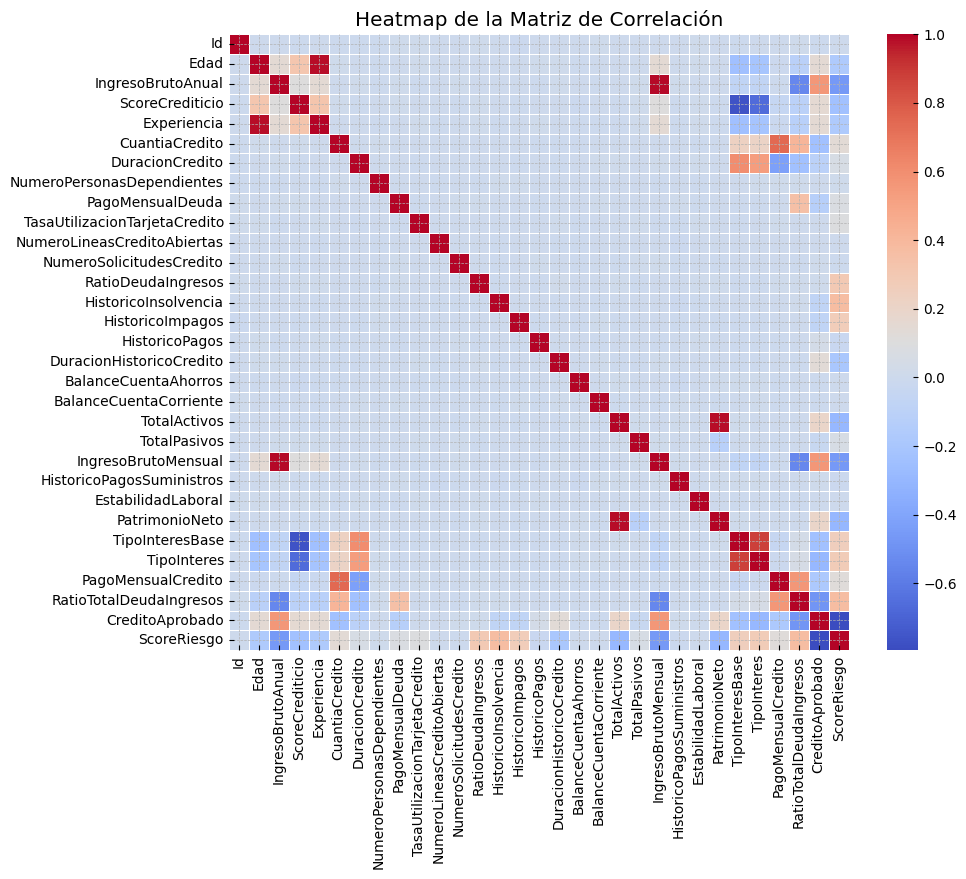

In [25]:
# Calcular la matriz de correlación
correlation_matrix = df[meta[(meta.dtype != 'object')].index].corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='0.2f', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

In [27]:
# Obtener el triángulo superior de la matriz de correlación
upper_triangle = np.triu(correlation_matrix, k=1)

# Crear una lista de tuplas (variable1, variable2, correlación)
correlations = []
for i in range(upper_triangle.shape[0]):
    for j in range(i + 1, upper_triangle.shape[1]):
        if abs(upper_triangle[i, j]) > 0.5:  # Filtrar por correlaciones > 0.5
            correlations.append((correlation_matrix.index[i], correlation_matrix.columns[j], upper_triangle[i, j]))

# Ordenar las correlaciones por valor absoluto de mayor a menor
correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Imprimir las correlaciones
for var1, var2, corr in correlations:
    print(f"{var1} y {var2} tienen una correlación de {corr:.2f}")

IngresoBrutoAnual y IngresoBrutoMensual tienen una correlación de 0.99
Edad y Experiencia tienen una correlación de 0.98
TotalActivos y PatrimonioNeto tienen una correlación de 0.98
TipoInteresBase y TipoInteres tienen una correlación de 0.88
CreditoAprobado y ScoreRiesgo tienen una correlación de -0.80
ScoreCrediticio y TipoInteresBase tienen una correlación de -0.76
CuantiaCredito y PagoMensualCredito tienen una correlación de 0.74
ScoreCrediticio y TipoInteres tienen una correlación de -0.66
DuracionCredito y TipoInteresBase tienen una correlación de 0.61
IngresoBrutoMensual y CreditoAprobado tienen una correlación de 0.56
PagoMensualCredito y RatioTotalDeudaIngresos tienen una correlación de 0.56
IngresoBrutoAnual y CreditoAprobado tienen una correlación de 0.56
IngresoBrutoMensual y RatioTotalDeudaIngresos tienen una correlación de -0.55
IngresoBrutoAnual y RatioTotalDeudaIngresos tienen una correlación de -0.54
DuracionCredito y TipoInteres tienen una correlación de 0.53


Observamos que existen numerosas correlaciones. Destacan:
- IngresoBrutoMensual e IngresoBrutoAnual (0.99)
- Edad y Experiencia (0.98)
- TotalActivos y PatrimonioNeto (0.98)
- TipoInteresBase y TipoInteres (0.88)
- CreditoAprobado y ScoreRiesgo (-0.8) <- Existe relación entre las variable objetivo, como se esperaba
- ScoreCrediticio y TipoInteresBase (-0.76)
- CuantiaCredito y PagoMensualCredito (0.74)
- ScoreCrediticio y TipoInteres (-0.66)
- TipoInteresBase y DuracionCredito (0.61)

### <font color='red'>TODO</font> Aplicar reducción de dimensionalidad con los datos anteriores, ya sea con PCA o eliminando directamente las variables muy correlacionadas

Aquí en el apartado Feature Selection presenta un par de métodos para eliminar variables: https://www.kaggle.com/code/bertcarremans/data-preparation-exploration/notebook#Feature-selection

En skrlearn: https://scikit-learn.org/1.5/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline

### Normalización y estandarización

### <font color='red'>TODO</font> Estudio de la normalización mediante la impresión de las gráficas de distribución de cada variable.

Como todavía no las hemos impreso me parece razonable hacerlo en este apartado. También, estudaría en que modelos sería necesario y el porqué. Y estudiar diferencia entre normalización y estandarización.

Aquí en Feature Scaling hace un pequeño estudio: https://www.kaggle.com/code/alirezahasannejad/data-preprocessing-in-machine-learning#7--Feature-scaling

### Análisis de outliers

### <font color='red'>TODO</font> Estudiar outliers.

Yo relacionaría el apartado anterior con este para justificar añadir el estudio de Guille de outliers. También encontré esto por si ayuda: https://www.kaggle.com/code/rpsuraj/outlier-detection-techniques-simplified#B)-Mulitivariate-Outliers: